In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import os

In [41]:
data= []
label= []
path= os.getcwd()
for i in range(43): # 43 type sign present in train data
    train_path= os.path.join(path, 'train',str(i))
    files= os.listdir(train_path)
    for file in files:
        try:
            image_file= cv2.imread(train_path+ "\\"+file)
            image_array= Image.fromarray(image_file)
            image_resize= image_array.resize((30, 30))
            data.append(np.array(image_resize))
            label.append(i)
        except:
            print(file)

In [42]:
data_array= np.array(data)
label_array= np.array(label)

In [43]:
#shuffling data
s= np.arange(data_array.shape[0])
np.random.seed(s)
np.random.shuffle(s)
data_array= data_array[s]
label_array= label_array[s]

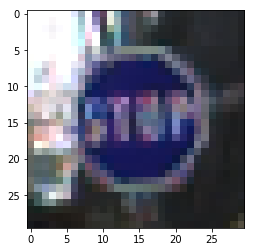

In [44]:
import matplotlib.pyplot as plt
plt.imshow(data_array[500])
plt.show()

In [45]:
#standardization of data
data_array= (data_array/255)-0.5

In [7]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data_array, label_array, random_state=73, test_size= 0.15)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
#model building
model= Sequential()
model.add(Conv2D(filters= 64,
                 kernel_size= (6,6),
                 activation='relu',
                 input_shape= x_train.shape[1:]))
model.add(Conv2D(filters= 64,
                 kernel_size= (6,6),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters= 128,
                 kernel_size= (3,3),
                 activation='relu'))
model.add(Conv2D(filters= 128,
                 kernel_size= (3,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation= 'sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(43, activation= 'softmax'))

In [10]:
#compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
#fit the model
history= model.fit(x_train, to_categorical(y_train), epochs= 5, batch_size= 64, validation_data= (x_test, to_categorical(y_test)))

Train on 33327 samples, validate on 5882 samples
Epoch 1/5
33327/33327 [==============================] - 459s 14ms/step - loss: 1.2210 - accuracy: 0.6733 - val_loss: 0.2486 - val_accuracy: 0.9374
Epoch 2/5
33327/33327 [==============================] - 450s 14ms/step - loss: 0.2198 - accuracy: 0.9437 - val_loss: 0.0998 - val_accuracy: 0.9767
Epoch 3/5
33327/33327 [==============================] - 445s 13ms/step - loss: 0.1200 - accuracy: 0.9683 - val_loss: 0.0648 - val_accuracy: 0.9825
Epoch 4/5
33327/33327 [==============================] - 443s 13ms/step - loss: 0.0841 - accuracy: 0.9770 - val_loss: 0.0514 - val_accuracy: 0.9859
Epoch 5/5
33327/33327 [==============================] - 443s 13ms/step - loss: 0.0655 - accuracy: 0.9817 - val_loss: 0.0401 - val_accuracy: 0.9883


In [14]:
#saving the model
model.save('trained_model.h5')

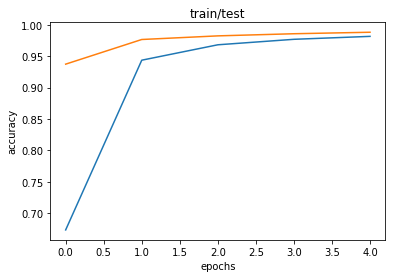

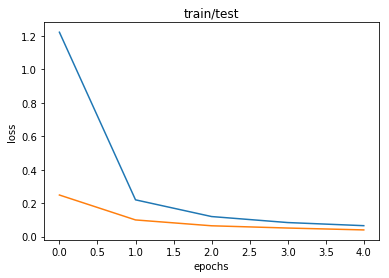

In [238]:
# comparing 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('train/test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('train/test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Test data

In [24]:
test_df= pd.read_csv('Test.csv')
meta_df= pd.read_csv('Meta.csv')

In [25]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [50]:
image= test_df['Path'].values
label= test_df['ClassId'].values
path= os.getcwd()
test_data=[]
for img in image:
    image_file= cv2.imread(path + '\\' + img.replace('/', '\\'))
    image_array= Image.fromarray(image_file, 'RGB')
    image_resize= image_array.resize((30,30))
    test_data.append(np.array(image_resize))

In [51]:
test_data= np.array(test_data)
test_data= (test_data/255)-0.5

In [62]:
label_pred=model.predict_classes(test_data)

In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(label, label_pred)

0.9593824228028504

# comparing test and predicted images


In [236]:
def cross_check(i):
    dt=[]
    ie= cv2.imread(path + '\\' + image[i].replace('/', '\\'))
    iy= Image.fromarray(ie, 'RGB')
    ize= iy.resize((30,30))
    dt.append(np.array(ize))
    dt= np.array(dt)
    dt= (dt/255)-0.5
    plt.figure(figsize=(8,8))
    plt.suptitle('comparsion')
    plt.subplot(1,2,1)
    plt.imshow(iy)
    plt.title('train image')
    l_pred=model.predict_classes(dt)
    meat_image=meta_df['Path'][meta_df['ClassId']==l_pred[0]]
    meat_image= meat_image.to_string(index= False)
    me= cv2.imread(path + '\\' + meat_image.replace('/', '\\').replace(' ', ''))
    my= Image.fromarray(me, 'RGB')
    plt.subplot(1,2,2)
    plt.imshow(my)
    plt.title('predicted image')
    plt.show()

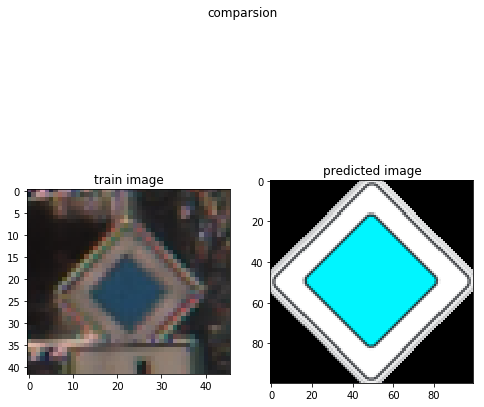

In [235]:
cross_check(6660)